# Data Analysis Projest Life Cycle
- **Business Problem Understanding**
- **Data Collection**
- **Data Pre-processing**
- **Exploratory Data Analysis**
- **Reporting**

## Business Problem
**Client wants us to analyze diwali sales data in order to understand the trend, insights, top performing products, categories, zones so that they can prepare better to improve sales**

## Data Collection
- Client has provided historial data in csv file
- Link: https://drive.google.com/file/d/1mGY1doT8RRTgIS0eZsiexHOjUIel9pvo/view?usp=drive_link

In [26]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#loading the data and check the data
data=pd.read_csv("Diwali Sales Data.csv",encoding='unicode_escape')
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952,NaN,NaN
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934,NaN,NaN
2,1001990.0,Bindu,P00118542,F,26-35,35,1.0,Uttar Pradesh,Central,Automobile,Auto,3.0,23924,NaN,NaN
3,1001425.0,Sudevi,P00237842,M,0-17,16,0.0,Karnataka,Southern,Construction,Auto,2.0,23912,NaN,NaN
4,1000588.0,Joni,P00057942,M,26-35,28,1.0,Gujarat,Western,Food Processing,Auto,2.0,23877,NaN,NaN


In [28]:
#creating a copy of data
df=data.copy()
df.head(3)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952,NaN,NaN
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934,NaN,NaN
2,1001990.0,Bindu,P00118542,F,26-35,35,1.0,Uttar Pradesh,Central,Automobile,Auto,3.0,23924,NaN,NaN


### Data Pre-Processing
- **Data profilling**
- **Data cleaning**
- **Data consistency**
- **Data Formating**
- **Outlier Detection & Removal**

In [29]:
df.shape

(11345, 15)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11345 entries, 0 to 11344
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11321 non-null  float64
 1   Cust_name         11344 non-null  object 
 2   Product_ID        11341 non-null  object 
 3   Gender            11341 non-null  object 
 4   Age Group         11339 non-null  object 
 5   Age               11334 non-null  object 
 6   Marital_Status    11339 non-null  float64
 7   State             11332 non-null  object 
 8   Zone              11334 non-null  object 
 9   Occupation        11339 non-null  object 
 10  Product_Category  11334 non-null  object 
 11  Orders            11342 non-null  float64
 12  Amount            11331 non-null  object 
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(5), object(10)
memory usage: 1.3+ MB


In [31]:
#null values
df.isna().sum()

User_ID                24
Cust_name               1
Product_ID              4
Gender                  4
Age Group               6
Age                    11
Marital_Status          6
State                  13
Zone                   11
Occupation              6
Product_Category       11
Orders                  3
Amount                 14
Status              11345
unnamed1            11345
dtype: int64

In [32]:
#all columns
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [33]:
#numerical columns
df.select_dtypes(include=np.number).columns

Index(['User_ID', 'Marital_Status', 'Orders', 'Status', 'unnamed1'], dtype='object')

In [34]:
#non-numerical columns
df.select_dtypes(include=object).columns

Index(['Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age', 'State',
       'Zone', 'Occupation', 'Product_Category', 'Amount'],
      dtype='object')

In [35]:
#duplicate values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11340    False
11341    False
11342    False
11343     True
11344    False
Length: 11345, dtype: bool

In [36]:
#filtering duplicate entries
df=df[~df.duplicated()]
df[df.duplicated()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1


### Data Profiling
1. **Amount**
    - Need to change the data type from object to integer
    - The rows corresponding to null values should be dropped
    - Need to drop the rows corresponding to values 'abcds'
    
2. **Status & unnamed1**
    - No data, should be dropped

3. **Orders**
    - Null values has to be dropped
    - Theres is outliers which can be removed

4. **State**
    - Andhra\xa0Pradesh & Nndhra\xa0Pradesh should be replaced with 'Andhra Pradesh'
    - Drop the rows corresponding to null values

5. **Zone**
    - Drop the rows corresponding to null values
    - 'Zentral' should be replaced with 'Central

6. **Product_ID**
    - Drop the rows corresponding to null values

7. **Marital_Status**
    - Null values can be replaced with mode
    - Will create a new column where '1' can be replaced with 'Married' and '0' with unmarried
8. **Age**
    - 'Age' can be replaced with mode
    - Null values can be replaced with mode
    - Data type needs to be changed from object to numeric

9. **Age Group**
    - 'low-high' can be replaced with mode
    - Null values can be replaced with mode
    
10. **Product_Category**
    - Null values can be dropped

11. **User_ID, Gender, Occupation**
    - Null values can be replaced with mod
   

### Data Cleaning

### status and unnamed1

In [37]:
#droping columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)


### Amount

In [38]:
#changing the data type to numeric
df['Amount']=pd.to_numeric(df['Amount'],errors='coerce')
#erros=coerce will convert unsupported values into null values

In [39]:
# Dropping rows corresponding to null values in the columns : 
#['Amount', 'Orders', 'State', 'Zone', 'Product_ID', 'Product_Category']
df.dropna(subset=['Amount','Orders','State','Zone','Product_ID','Product_Category'],inplace=True)

In [40]:
#null_values=df.isna().sum()
#null_values
null_percentage=(df.isna().sum()/(df.shape[0]))*100
null_percentage

User_ID             0.204372
Cust_name           0.000000
Product_ID          0.000000
Gender              0.017771
Age Group           0.044429
Age                 0.079972
Marital_Status      0.044429
State               0.000000
Zone                0.000000
Occupation          0.044429
Product_Category    0.000000
Orders              0.000000
Amount              0.000000
dtype: float64

### state and zone

In [41]:
#df['State'].unique()
df['State']=df['State'].str.replace('Andhra\xa0Pradesh', 'Andhra Pradesh')
df['State']=df['State'].str.replace('Nndhra\xa0Pradesh', 'Andhra Pradesh')
df['Zone']=df['Zone'].str.replace('Zentral', 'Central')


#### Product_ID
Already cleaned

### Martial_status

In [42]:
#replace the null value with mode
Marital_Status_mode=df['Marital_Status'].mode()[0]
Marital_Status_mode
df['Marital_Status']=df['Marital_Status'].fillna(Marital_Status_mode)

In [43]:
#creating new column with martial_status
df['marriage status']=df['Marital_Status'].apply(lambda x:'Married' if(x==1) else 'Unmarried') #1 mean married and o mean unmarried

### Age

In [44]:
# Changing the data type from object to numeric
df['Age']=pd.to_numeric(df['Age'],errors='coerce')

In [45]:
# Replace the null values with mode
age_mode=df['Age'].mode()[0]
df['Age']=df['Age'].fillna(age_mode)

### Age Group

In [46]:
#age group column null value replace with mode
age_group_mode=df['Age Group'].mode()[0]
age_group_mode
df['Age Group']=df['Age Group'].str.replace('low-high',age_group_mode)
df['Age Group']=df['Age Group'].fillna(age_group_mode)

#### Product_Category
Already executed

#### User_ID, Gender & Occupation

In [47]:
# Replacing null values with mode
gender_mode=df['Gender'].mode()[0]
occupation_mode=df['Occupation'].mode()[0]
df['Gender']=df['Gender'].fillna(gender_mode)
df['Occupation']=df['Occupation'].fillna(occupation_mode)
userid_mode=df['User_ID'].mode()[0]
df['User_ID']=df['User_ID'].fillna(userid_mode)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11254 entries, 0 to 11340
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11254 non-null  float64
 1   Cust_name         11254 non-null  object 
 2   Product_ID        11254 non-null  object 
 3   Gender            11254 non-null  object 
 4   Age Group         11254 non-null  object 
 5   Age               11254 non-null  float64
 6   Marital_Status    11254 non-null  float64
 7   State             11254 non-null  object 
 8   Zone              11254 non-null  object 
 9   Occupation        11254 non-null  object 
 10  Product_Category  11254 non-null  object 
 11  Orders            11254 non-null  float64
 12  Amount            11254 non-null  float64
 13  marriage status   11254 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.3+ MB


In [48]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
marriage status     0
dtype: int64

### outlier detection and removal

In [27]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125400e+04,11254.000000,11254.000000,11254.000000,1.125400e+04
mean,1.013664e+06,35.424382,0.419762,2.494135,1.916697e+05
std,3.263686e+05,12.753259,0.493542,1.186925,1.072906e+07
min,1.000001e+06,12.000000,0.000000,1.000000,1.880000e+02
25%,1.001496e+06,27.000000,0.000000,2.000000,5.445000e+03
50%,1.003064e+06,33.000000,0.000000,2.000000,8.113000e+03
75%,1.004430e+06,43.000000,1.000000,3.000000,1.269900e+04
max,1.100505e+07,92.000000,1.000000,40.000000,8.760212e+08


Text(0.5, 1.0, 'box plot for Amount')

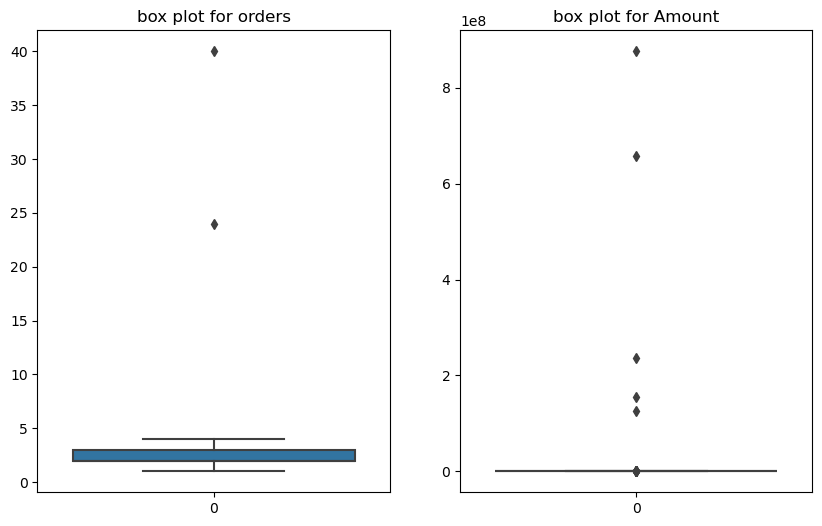

In [49]:
#visualization of outliers
fig,ax=plt.subplots(1,2,figsize=(10,6))
sns.boxplot(data=df['Orders'],ax=ax[0])
ax[0].set_title("box plot for orders")
sns.boxplot(data=df['Amount'],ax=ax[1])
ax[1].set_title("box plot for Amount")

### Orders

In [50]:

q1_order=np.quantile(df['Orders'],0.25) #quartile 1 25%,2 50%
q3_order=np.quantile(df['Orders'],0.75)
iqr_order=q3_order-q1_order
#iqr_order
lower_limit_order=q1_order - 1.5*iqr_order
upper_limit_order=q3_order + 1.5*iqr_order
#print(lower_limit_order)
#print(upper_limit_order)

In [51]:
#removing the outliers which shows dot or symbols in figure
df=df[(df['Orders']>lower_limit_order) & (df['Orders']<upper_limit_order)]
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125200e+04,11252.000000,11252.000000,11252.000000,1.125200e+04
mean,1.011889e+06,35.423303,0.419836,2.488891,1.917000e+05
std,2.979871e+05,12.753743,0.493554,1.114844,1.073001e+07
min,1.000001e+06,12.000000,0.000000,1.000000,1.880000e+02
25%,1.001496e+06,27.000000,0.000000,2.000000,5.444750e+03
50%,1.003064e+06,33.000000,0.000000,2.000000,8.113000e+03
75%,1.004429e+06,43.000000,1.000000,3.000000,1.269900e+04
max,1.100505e+07,92.000000,1.000000,4.000000,8.760212e+08


### Amount

In [52]:
q1_amount=np.quantile(df['Amount'],0.25) #quartile 1 25%,2 50%
q3_amount=np.quantile(df['Amount'],0.75)
iqr_amount=q3_amount - q1_amount
#iqr_order
lower_limit_amount=q1_amount - 1.5*iqr_amount
upper_limit_amount=q3_amount + 1.5*iqr_amount
#print(lower_limit_amount)
#print(upper_limit_amount)

In [53]:
# Removing the outliers
df=df[(df['Amount'] > lower_limit_amount) & (df['Amount'] < upper_limit_amount)]


In [54]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123400e+04,11234.000000,11234.000000,11234.000000,11234.000000
mean,1.007453e+06,35.433772,0.419708,2.489496,9452.764638
std,2.109026e+05,12.759432,0.493533,1.114845,5213.784648
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001496e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.500000
75%,1.004429e+06,43.000000,1.000000,3.000000,12681.500000
max,1.100173e+07,92.000000,1.000000,4.000000,23568.000000


In [60]:
# Saving the cleaned data
df.to_csv("diwali sale cleaned data.csv")
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'marriage status'],
      dtype='object')

### Exploratory data analysis

### Statistical Analysis

In [61]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,marriage status
18,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
19,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married


In [62]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123400e+04,11234.000000,11234.000000,11234.000000,11234.000000
mean,1.007453e+06,35.433772,0.419708,2.489496,9452.764638
std,2.109026e+05,12.759432,0.493533,1.114845,5213.784648
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001496e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.500000
75%,1.004429e+06,43.000000,1.000000,3.000000,12681.500000
max,1.100173e+07,92.000000,1.000000,4.000000,23568.000000


### Data Visualization

#### Analysis Parameter
- Gender
- Maraige_Status
- Age Group
- Product_Category
- State
- Product_ID
- Occupation

### Gender wise orders and amount analysis

In [63]:
#Plot data
data_gender_count=df.groupby(['Gender'],as_index=False)['Orders'].count()
print("gender wise order count:",data_gender_count)
data_gender_amount=df.groupby(['Gender'],as_index=False)['Amount'].sum()
print("gender wise purcahse power:",data_gender_amount)


gender wise order count:   Gender  Orders
0      F    7835
1      M    3399
gender wise purcahse power:   Gender       Amount
0      F  74422989.94
1      M  31769368.00


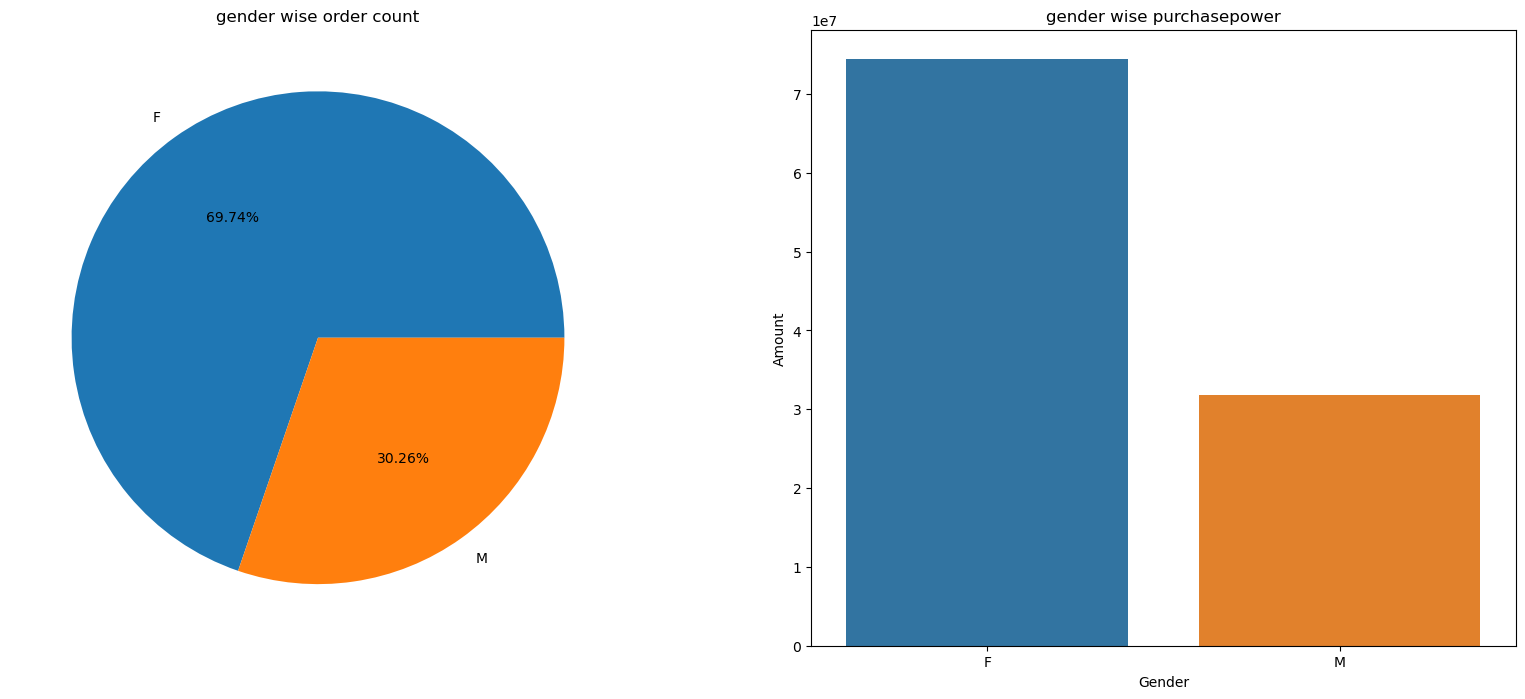

In [64]:
#plotting
fig,ax=plt.subplots(1,2,figsize=(20,8))
#pie chart
ax[0].pie(x=data_gender_count['Orders'],labels=data_gender_count['Gender'],autopct='%1.2f%%')
ax[0].set_title('gender wise order count')
#bar chart
sns.barplot(x='Gender',y='Amount',data=data_gender_amount,ax=ax[1])
ax[1].set_title('gender wise purchasepower')
plt.show()

#### Conclusion:
Females generally places more order and their purchase power is also higher

### Marriage Status wise Analysis

In [65]:
#plot data
data_marriage_status_amount=df.groupby(['marriage status'],as_index=False)['Amount'].sum()
data_marriage_status_amount

,marriage status,Amount
0,Married,44003938.00
1,Unmarried,62188419.94


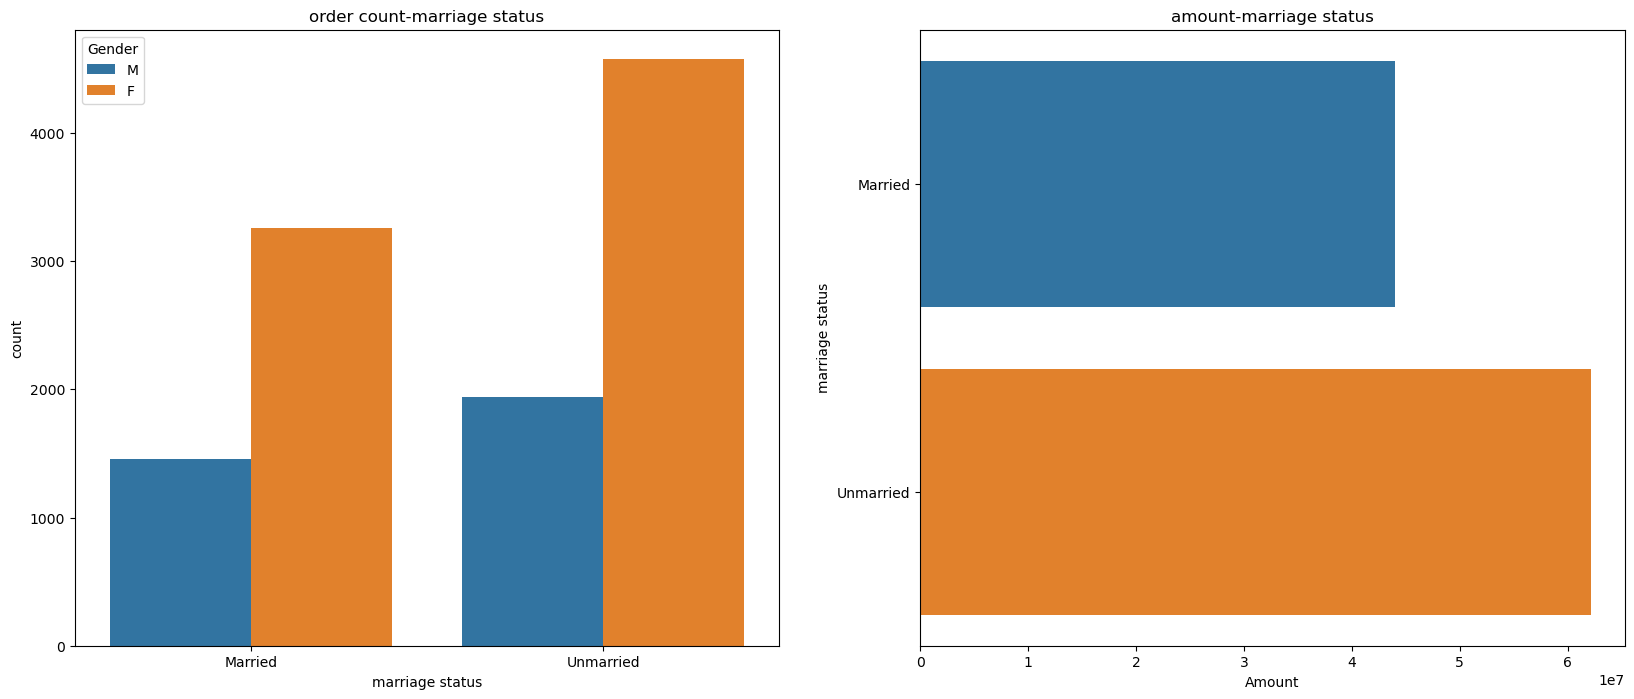

In [66]:
#plots
fig,ax=plt.subplots(1,2,figsize=(20,8))
#count plot
sns.countplot(x='marriage status',hue='Gender',data=df,ax=ax[0])
ax[0].set_title('order count-marriage status')
#barplot for purchase power
sns.barplot(y='marriage status',x='Amount',orient='h',data=data_marriage_status_amount,ax=ax[1])
ax[1].set_title('amount-marriage status')
plt.show()

### conclusion:
unmarried females are spending more compare to married female and male

### Age Group wise orders and amount analysis

In [67]:
#plot data
data_age_group_amount=df.groupby(['Age Group'],as_index=False)['Amount'].sum()
data_age_group_amount

,Age Group,Amount
0,0-17,2696529.00
1,18-25,17032196.00
2,26-35,42603794.95
3,36-45,22234332.99
4,46-50,9245595.00
5,51-55,8278320.00
6,55+,4101590.00


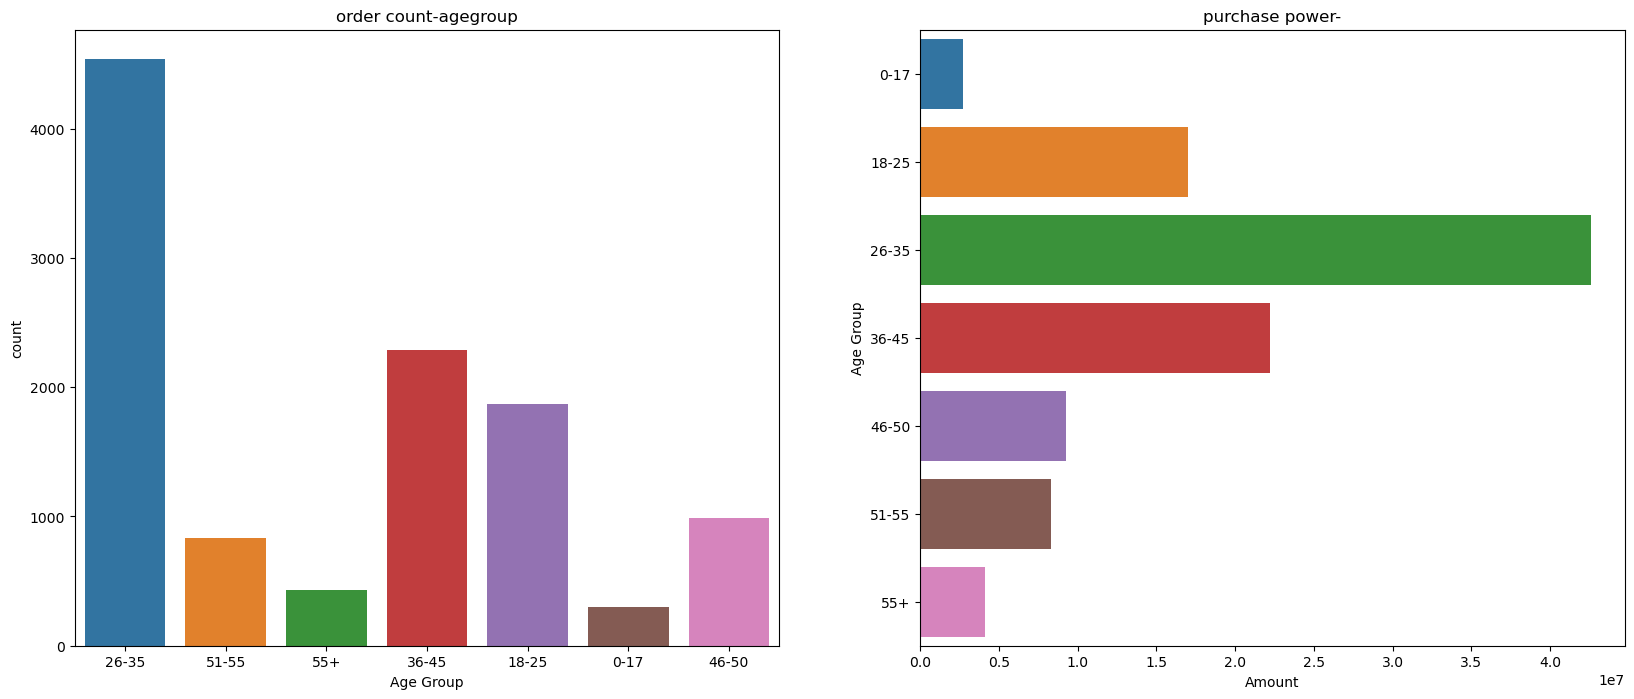

In [68]:
#plots
fig,ax=plt.subplots(1,2,figsize=(20,8))
#countplot
sns.countplot(x='Age Group',data=df,ax=ax[0])
ax[0].set_title('order count-agegroup')
#barplot for purchase power
sns.barplot(y='Age Group',x='Amount',orient='h',data=data_age_group_amount,ax=ax[1])
ax[1].set_title('purchase power-')
plt.show()

### conclusion:
26-35 age group people buy more

In [46]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'marriage status'],
      dtype='object')

In [102]:
#data_occupation_amount=df.groupby(['Occupation'],as_index=False)['Orders'].count()
#data_occupation_amount

### Occupation wise orders and amount analysis

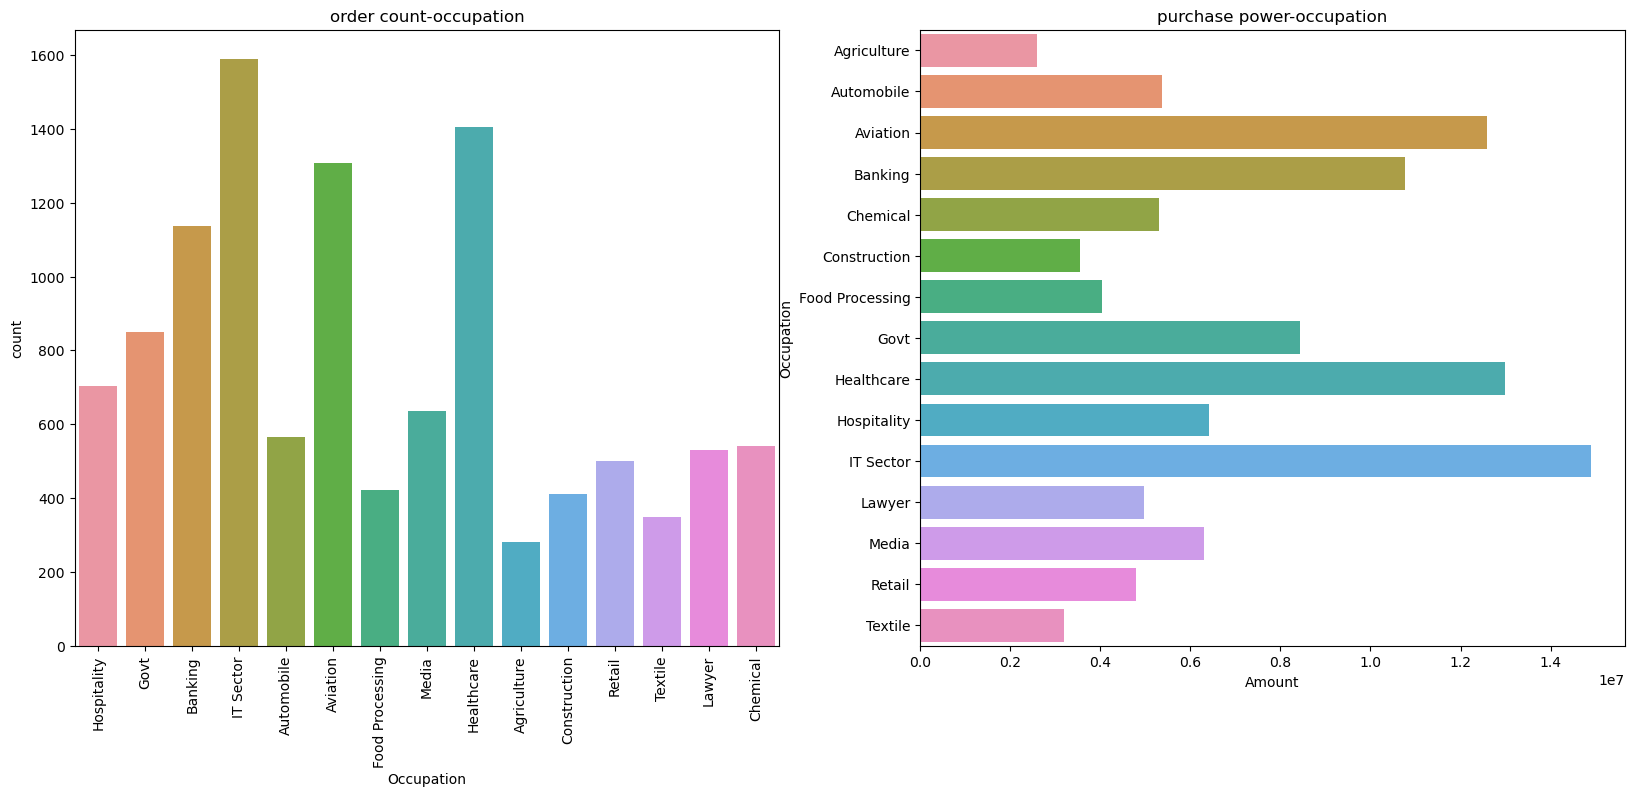

In [40]:
data_occupation_amount=df.groupby(['Occupation'],as_index=False)['Amount'].sum()
data_occupation_amount
fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x='Occupation',data=df,ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
ax[0].set_title('order count-occupation')
sns.barplot(y='Occupation',x='Amount',orient='h',data=data_occupation_amount,ax=ax[1])
ax[1].set_title('purchase power-occupation')
plt.show()

### conclusion:
IT sector's people order more and pay more amount than other occupations

### product category

In [41]:
data_productcat_order=df.groupby(['Product_Category'],as_index=False)['Orders'].count()
data_productcat_order

,Product_Category,Orders
0,Auto,83
1,Beauty,422
2,Books,103
3,Clothing & Apparel,2653
4,Decor,96
5,Electronics & Gadgets,2082
6,Food,2490
7,Footwear & Shoes,1080
8,Furniture,354
9,Games & Toys,386


In [42]:
data_productcat_amount=df.groupby(['Product_Category'],as_index=False)['Amount'].sum()
data_productcat_amount

,Product_Category,Amount
0,Auto,1624503.00
1,Beauty,1959484.00
2,Books,1061478.00
3,Clothing & Apparel,16484472.00
4,Decor,730360.00
5,Electronics & Gadgets,15607657.00
6,Food,33933883.50
7,Footwear & Shoes,16009057.45
8,Furniture,5481325.99
9,Games & Toys,4331694.00


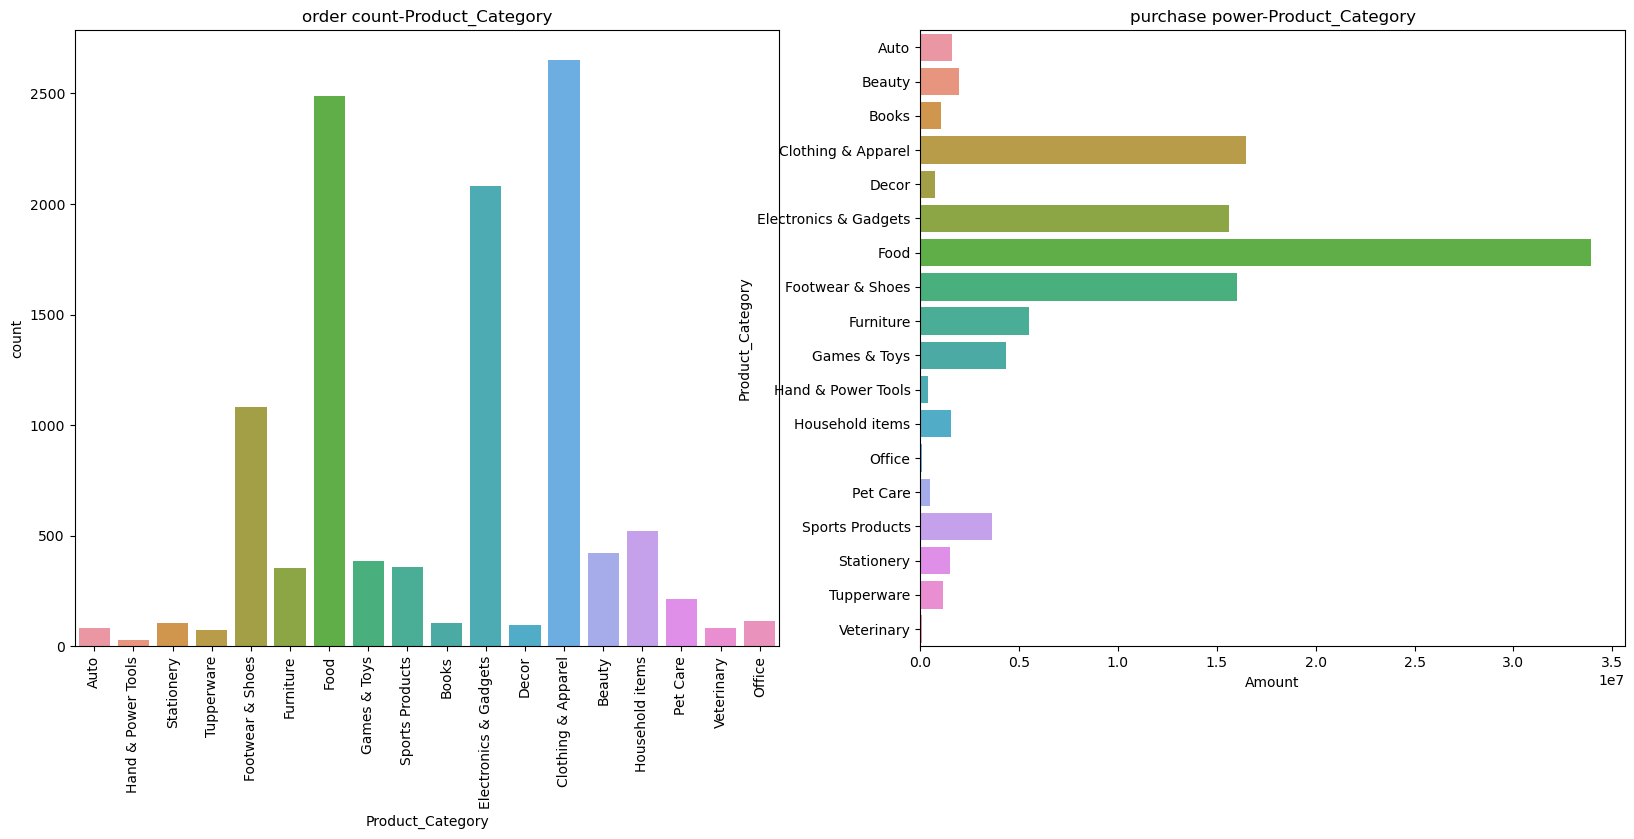

In [43]:
data_productcat_amount=df.groupby(['Product_Category'],as_index=False)['Amount'].sum()
data_productcat_amount
fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x='Product_Category',data=df,ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
ax[0].set_title('order count-Product_Category')
sns.barplot(y='Product_Category',x='Amount',orient='h',data=data_productcat_amount,ax=ax[1])
ax[1].set_title('purchase power-Product_Category')
plt.show()

### <u>conclusion</u>:
The Food category generates the highest revenue despite a lower order count, compared to Clothing & Apparel, which leads in order count but not in total amount spent.


In [49]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'marriage status'],
      dtype='object')

### product_id  

Gender wise Purchase Power 
       index Product_ID    Amount
1678   1678  P00265242  561461.0
1146   1146  P00184942  401816.0
644     644  P00110942  400899.0
396     396  P00059442  359230.0
654     654  P00112142  341020.0
Gender wise order count 
       index Product_ID  Orders
1678   1678  P00265242      54
644     644  P00110942      43
1146   1146  P00184942      37
1503   1503  P00237542      35
654     654  P00112142      34


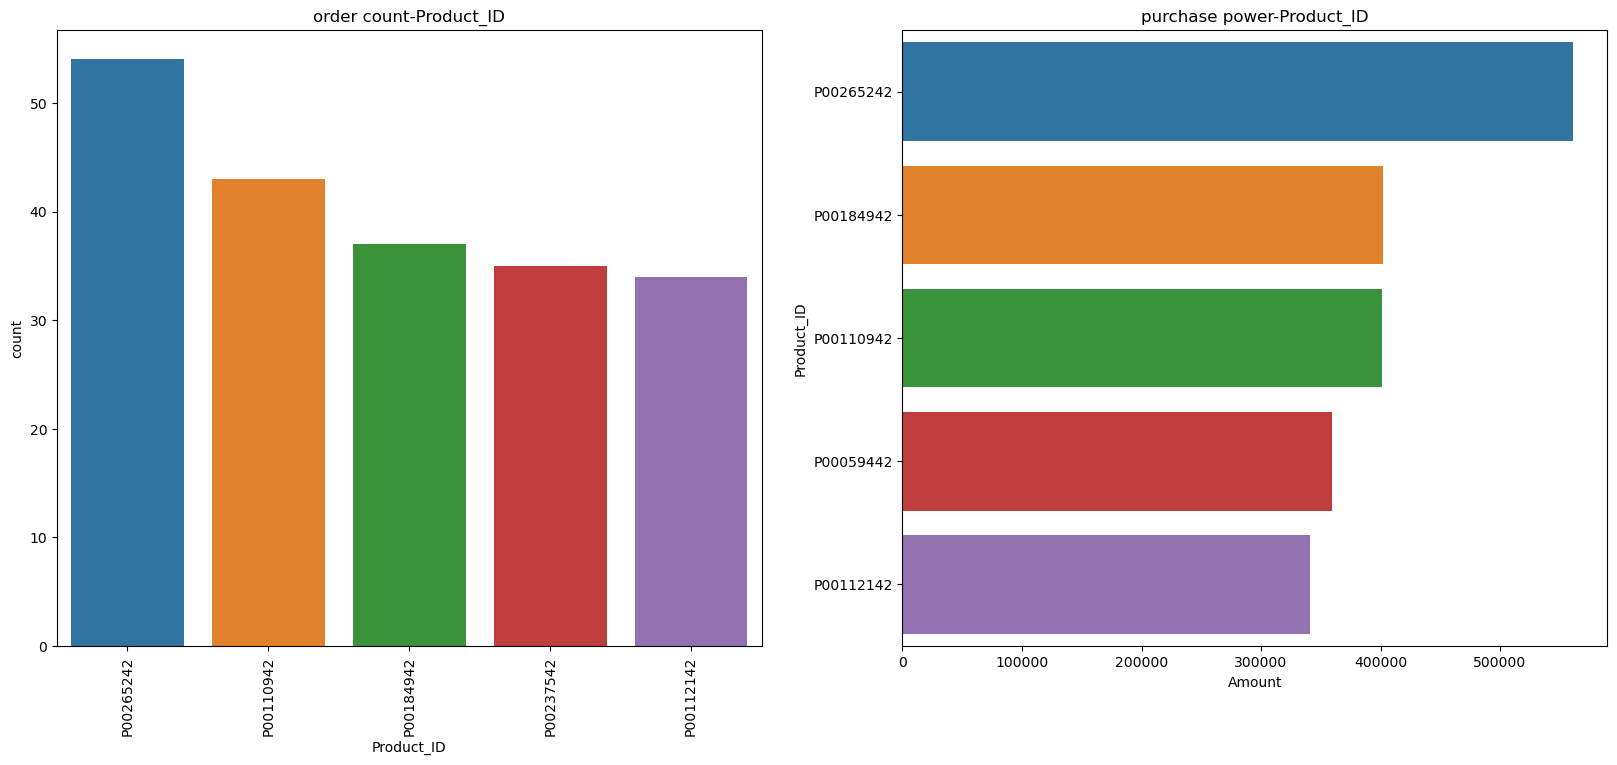

In [61]:
data_prid_amount = df.groupby(['Product_ID'], as_index = False)['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False).head(5)
print("Gender wise Purchase Power \n", data_prid_amount)
data_prid_count = df.groupby(['Product_ID'], as_index = False)['Orders'].count().reset_index().sort_values(by='Orders', ascending=False).head(5)
print("Gender wise order count \n", data_prid_count)
fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x='Product_ID',data=df,order=data_prid_count['Product_ID'],ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
ax[0].set_title('order count-Product_ID')
sns.barplot(y='Product_ID',x='Amount',orient='h',data=data_prid_amount,ax=ax[1])
ax[1].set_title('purchase power-Product_ID')
plt.show()

### conclusion
Product ID P00265242 is the top performer in both order count and total amount spent.


### statewise orders and amount analysis

state wise order count 
     index           State  Orders
14     14   Uttar Pradesh    1943
10     10     Maharashtra    1522
7       7       Karnataka    1313
2       2           Delhi    1102
9       9  Madhya Pradesh     921
state wise Purchase Power 
     index           State       Amount
14     14   Uttar Pradesh  19360148.00
10     10     Maharashtra  14400762.00
7       7       Karnataka  13705829.00
2       2           Delhi  11554343.95
9       9  Madhya Pradesh   8100944.00


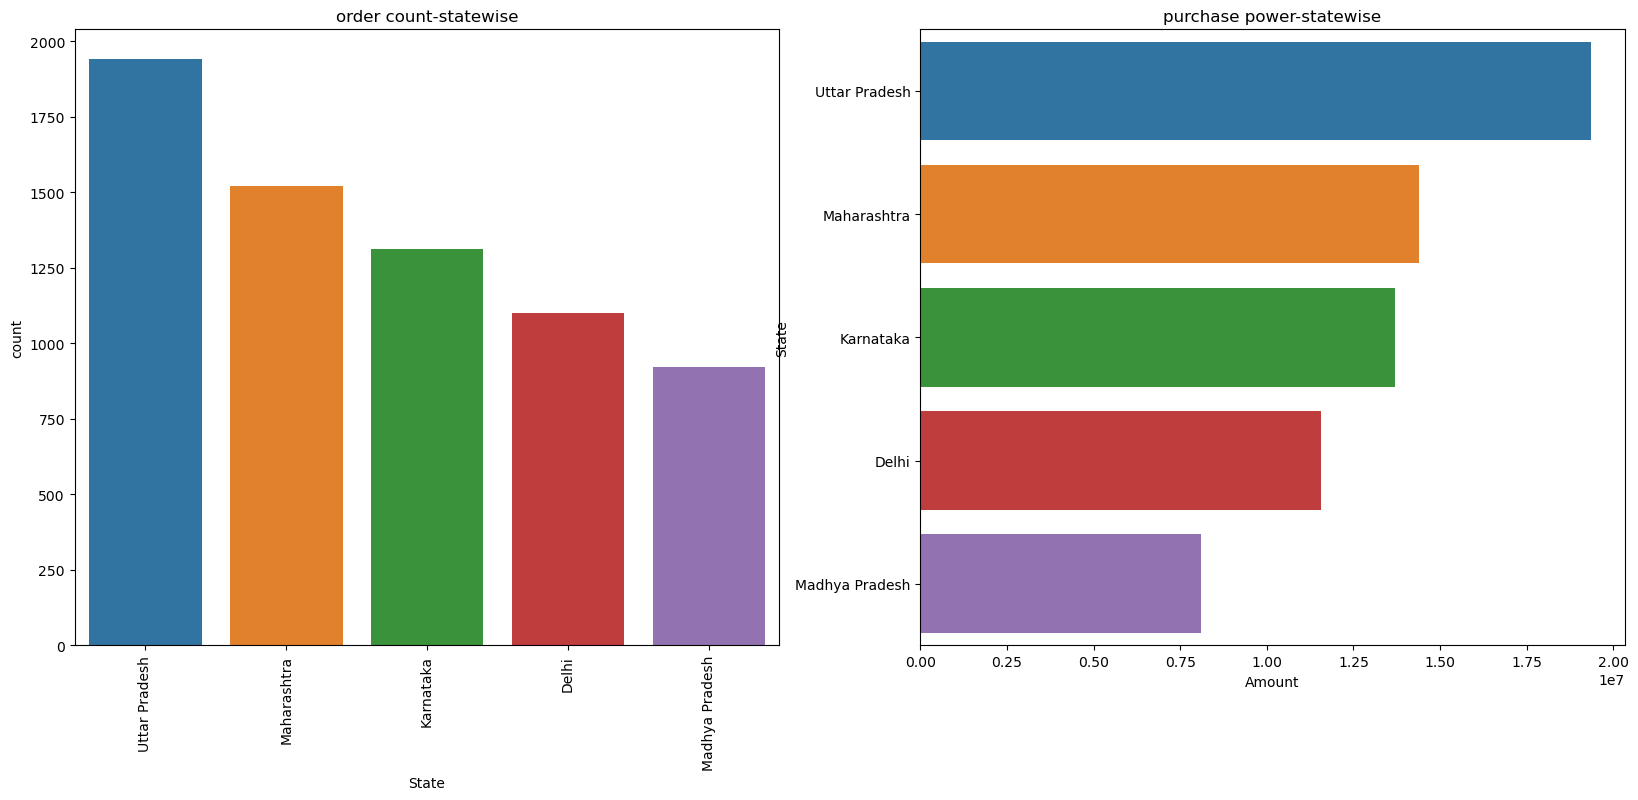

In [62]:
data_sw_count = df.groupby(['State'], as_index = False)['Orders'].count().reset_index().sort_values(by='Orders', ascending=False).head(5)
print("state wise order count \n", data_sw_count)
data_sw_amount = df.groupby(['State'], as_index = False)['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False).head(5)
print("state wise Purchase Power \n", data_sw_amount)
fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x='State',data=df,order=data_sw_count['State'],ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
ax[0].set_title('order count-statewise')
sns.barplot(y='State',x='Amount',orient='h',data=data_sw_amount,ax=ax[1])
ax[1].set_title('purchase power-statewise')
plt.show()

### conclusion:
Uttar Pradesh and Maharashtra are the top states in terms of order count and total amount spent.